<a href="https://colab.research.google.com/github/Rajaanthonysamy/PyTorch/blob/main/03_PyTorchClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import sklearn
from sklearn.datasets import make_circles
n_samples=1000
X,y =make_circles(n_samples=n_samples,noise=0.03,random_state=42)
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [114]:
X[:5] , y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [115]:
type(X)

numpy.ndarray

In [116]:
import pandas as pd
df=  pd.DataFrame(X,columns=['a','b'])

In [117]:
target_df = pd.DataFrame(y,columns=['target'])

In [118]:
df= pd.concat([df,target_df],axis=1)

In [119]:
df

a         b  target
0    0.754246  0.231481       1
1   -0.756159  0.153259       1
2   -0.815392  0.173282       1
3   -0.393731  0.692883       1
4    0.442208 -0.896723       0
..        ...       ...     ...
995  0.244054  0.944125       0
996 -0.978655 -0.272373       0
997 -0.136900 -0.810012       1
998  0.670362 -0.767502       0
999  0.281057  0.963824       0

[1000 rows x 3 columns]

In [120]:
df['target'].value_counts()

target
1    500
0    500
Name: count, dtype: int64

In [121]:
df.target.unique()

array([1, 0])

In [122]:
import matplotlib.pyplot as plt

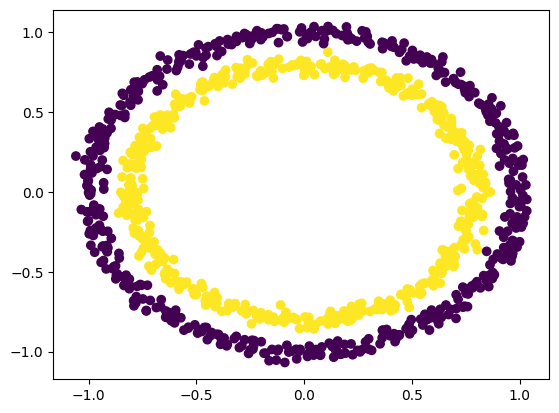

In [123]:
plt.scatter(df['a'],df['b'],c=df['target'])

In [124]:
import torch

In [125]:
X=torch.from_numpy(df[['a','b']].values).type(torch.float)
y=torch.from_numpy(df['target'].values).type(torch.float)

In [126]:
X.dtype

torch.float32

In [127]:
torch.manual_seed(42)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [129]:
X_train.shape

torch.Size([800, 2])

In [130]:
from torch import nn

device= "cuda" if torch.cuda.is_available() else "cpu"

In [131]:
device

'cuda'

In [132]:
 class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.layer_2(self.relu(self.layer_1(x))))

model_0= CircleModel()
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [133]:
epochs=1
model = CircleModel().to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)



In [134]:
model_0=nn.Sequential(nn.Linear(in_features=2,out_features=5),
              nn.ReLU(),
              nn.Linear(in_features=5,out_features=1),
              nn.Sigmoid()
              ).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)

In [135]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236], device='cuda:0')),
             ('2.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]], device='cuda:0')),
             ('2.bias', tensor([0.1379], device='cuda:0'))])

In [136]:
un_tarined_preds=model_0(X_test.to(device))

In [137]:
un_tarined_preds[:5], y_test[:5]

(tensor([[0.5196],
         [0.5333],
         [0.5087],
         [0.5201],
         [0.5912]], device='cuda:0', grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1.]))

In [138]:
loss = nn.BCEWithLogitsLoss()
##torch.binary_cross_entropy_with_logits(un_tarined_preds,y_test.unsqueeze(dim=1).to(device))
opti= torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [139]:
def accuraacy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

In [140]:
model_0.eval()
with torch.inference_mode():
  y_logits= model_0(X_test.to(device))
y_logits[:5]

tensor([[0.5196],
        [0.5333],
        [0.5087],
        [0.5201],
        [0.5912]], device='cuda:0')

In [141]:
torch.round(y_logits[:5])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [142]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [143]:
epochs=200
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train ,y_train = X_train.to(device),y_train.to(device)
X_test ,y_test = X_test.to(device),y_test.to(device)

for i in range(epochs):
  model_0.train()
  y_logits=model_0(X_train.to(device)).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuraacy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuraacy_fn(y_true=y_test,y_pred=test_pred)

  if i%10==0:

    print(f"epoch {i}, loss {test_loss}, Accuiracy {test_acc}")


epoch 0, loss 0.6950705051422119, Accuiracy 50.0
epoch 10, loss 0.6950705051422119, Accuiracy 50.0
epoch 20, loss 0.6950705051422119, Accuiracy 50.0
epoch 30, loss 0.6950705051422119, Accuiracy 50.0
epoch 40, loss 0.6950705051422119, Accuiracy 50.0
epoch 50, loss 0.6950705051422119, Accuiracy 50.0
epoch 60, loss 0.6950705051422119, Accuiracy 50.0
epoch 70, loss 0.6950705051422119, Accuiracy 50.0
epoch 80, loss 0.6950705051422119, Accuiracy 50.0
epoch 90, loss 0.6950705051422119, Accuiracy 50.0
epoch 100, loss 0.6950705051422119, Accuiracy 50.0
epoch 110, loss 0.6950705051422119, Accuiracy 50.0
epoch 120, loss 0.6950705051422119, Accuiracy 50.0
epoch 130, loss 0.6950705051422119, Accuiracy 50.0
epoch 140, loss 0.6950705051422119, Accuiracy 50.0
epoch 150, loss 0.6950705051422119, Accuiracy 50.0
epoch 160, loss 0.6950705051422119, Accuiracy 50.0
epoch 170, loss 0.6950705051422119, Accuiracy 50.0
epoch 180, loss 0.6950705051422119, Accuiracy 50.0
epoch 190, loss 0.6950705051422119, Accuir

In [144]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236], device='cuda:0')),
             ('2.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]], device='cuda:0')),
             ('2.bias', tensor([0.1379], device='cuda:0'))])

In [2]:
def test(func):
  print("test")
  def inner():
    print("Inside inner")
    func()
    print("after func")
  return inner

@test
def outer():
  print("Outer")
outer()

test
Inside inner
Outer
after func


TypeError: 'NoneType' object is not callable

In [153]:
def test(func):   # decorator takes the function
    def inner():
        print("Inside inner")
        func()   # <-- actually call the function
        print("after func")
    return inner

@test
def outer():
    print("Outer")

# Call it
outer()


Inside inner
Outer
after func
